In [23]:
import os
import fnmatch
import re
import numpy as np
import matplotlib.pyplot as plt


def find_files(directory, pattern='*.csv'):
    ''' Recursively finds all files matching the pattern.'''
    files = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, pattern):
            files.append(os.path.join(root, filename))
    return files

def load_data_samples(directory):
    ''' Generator that yields audio waveforms from the directory.'''
    files = find_files(directory)
    print("files length: {}".format(len(files)))
    id_reg_expression = re.compile(FILE_PATTERN)
    for filename in files:
        f = open(filename)
        lines = f.readlines()
        original = []
        prediction = []
        for j in range(1, len(lines)):
            items = lines[j].strip().split(",")
            original.append(float(items[0]))
            prediction.append(float(items[1]))
        f.close()

        id = int(id_reg_expression.findall(filename)[0])
        loss = lines[0]
        
        yield original, prediction, id, loss

files length: 99


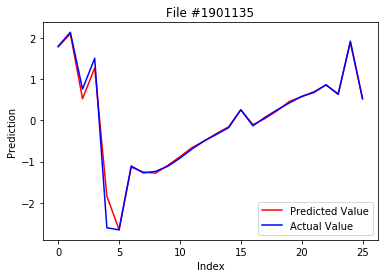

MSE 0.0271601



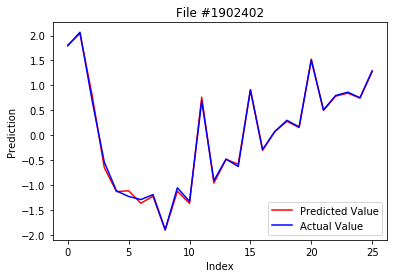

MSE 0.00241192



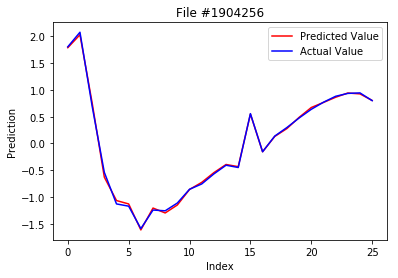

MSE 0.00112117



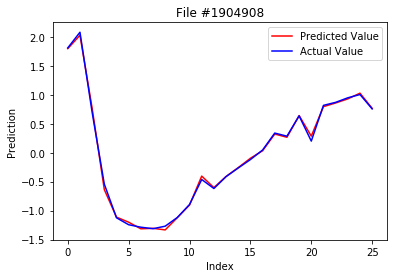

MSE 0.00145156



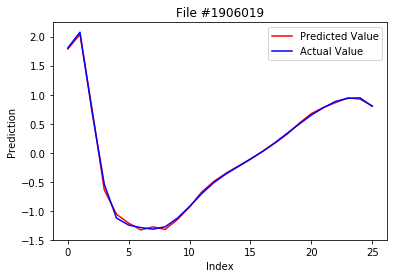

MSE 0.0010755



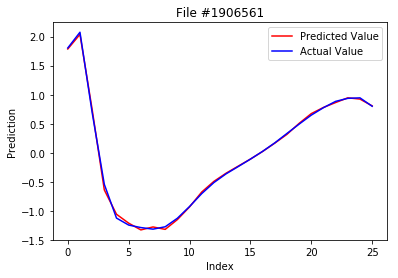

MSE 0.0010755



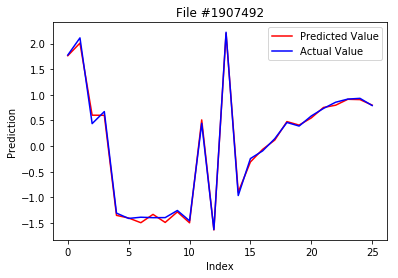

MSE 0.00359253



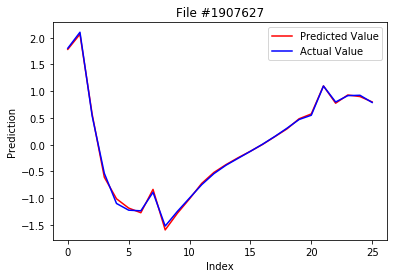

MSE 0.00122654



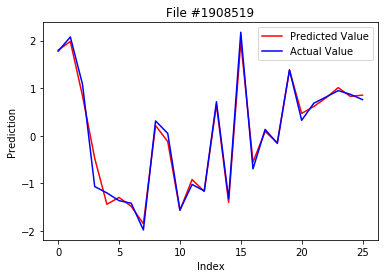

MSE 0.0257325



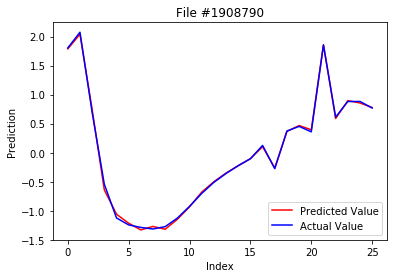

MSE 0.00111309



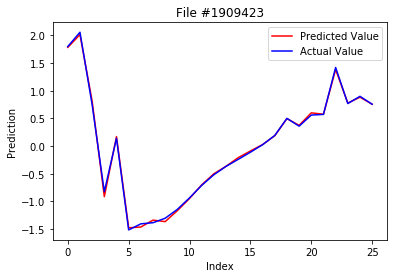

MSE 0.00123165



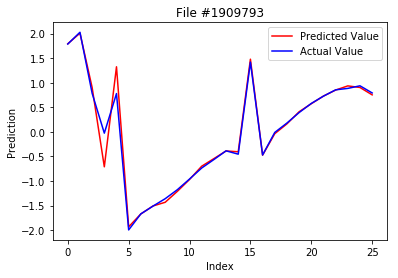

MSE 0.0310175



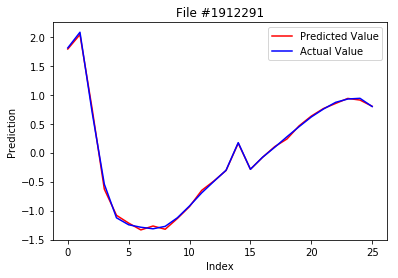

MSE 0.0010906



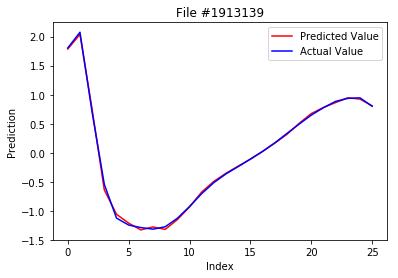

MSE 0.0010755



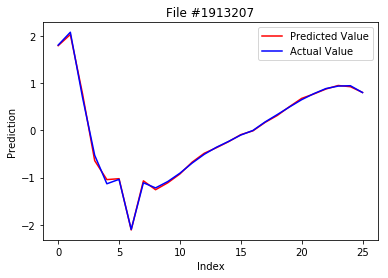

MSE 0.00140915



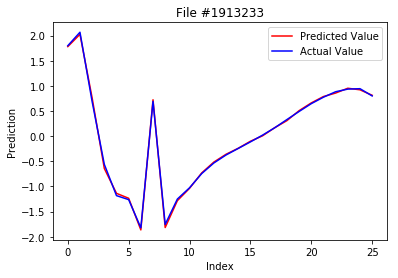

MSE 0.00110247



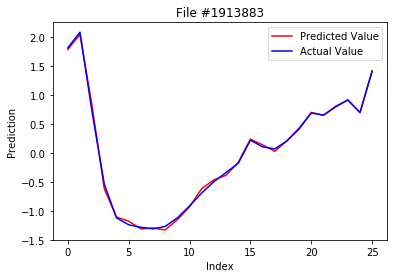

MSE 0.00162538



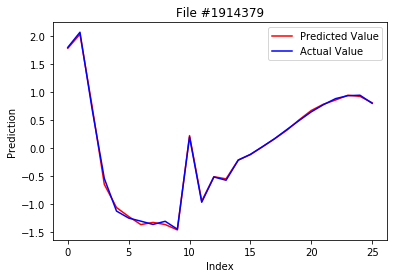

MSE 0.00123103



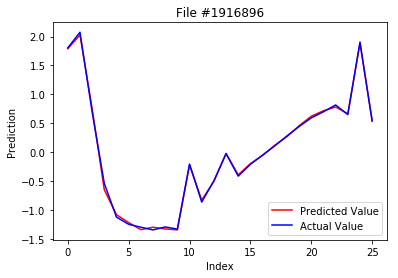

MSE 0.00120632



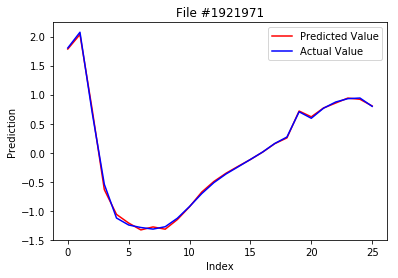

MSE 0.00102798



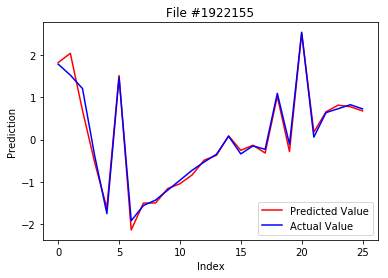

MSE 0.0281242



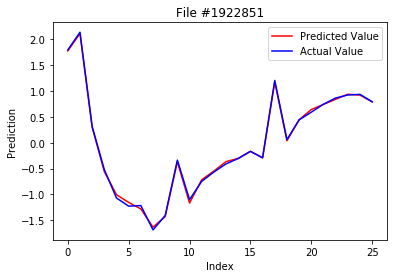

MSE 0.00127234



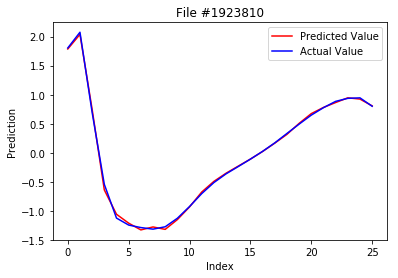

MSE 0.0010755



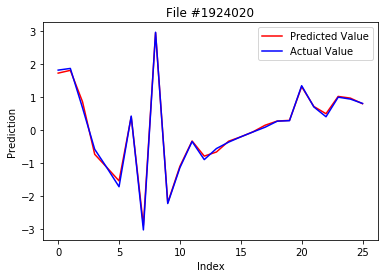

MSE 0.00619882



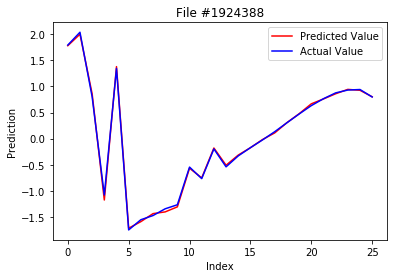

MSE 0.00111877



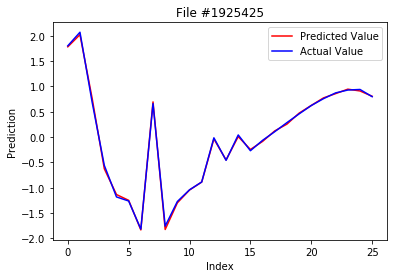

MSE 0.00104553



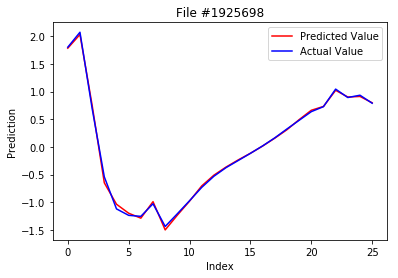

MSE 0.00139046



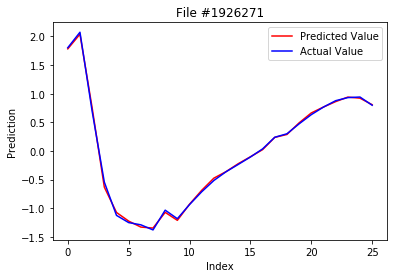

MSE 0.000990908



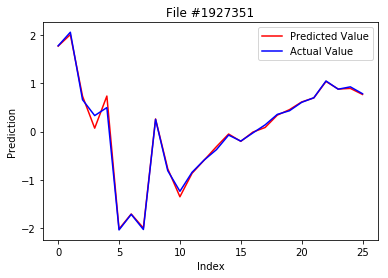

MSE 0.00611921



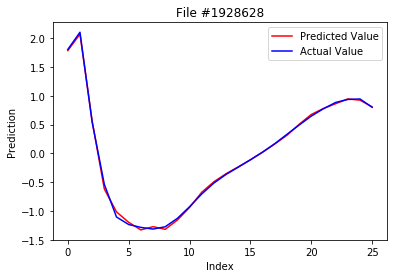

MSE 0.00106679



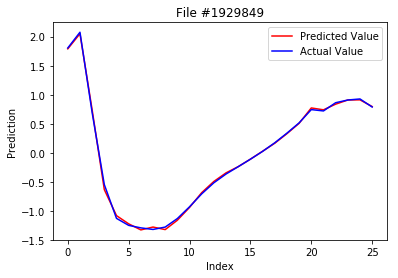

MSE 0.000877718



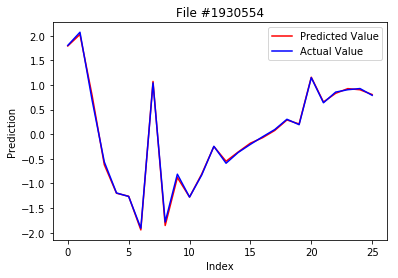

MSE 0.00124778



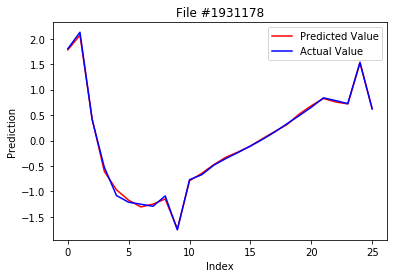

MSE 0.00150643



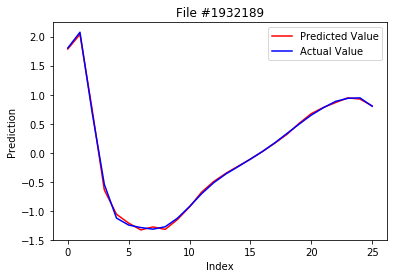

MSE 0.0010755



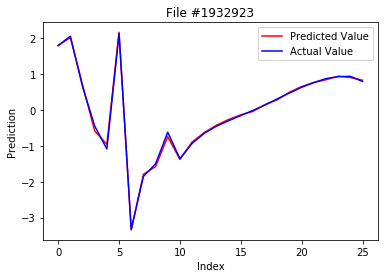

MSE 0.00297271



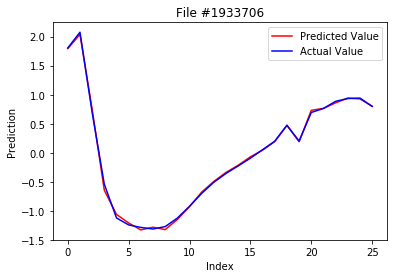

MSE 0.00115191



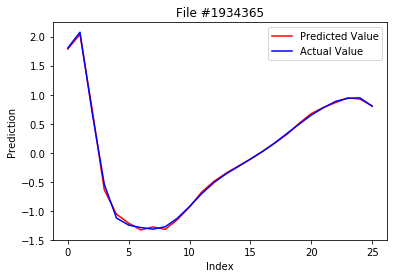

MSE 0.0010755



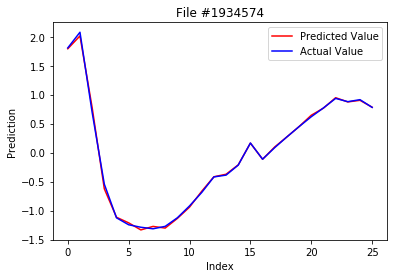

MSE 0.000987792



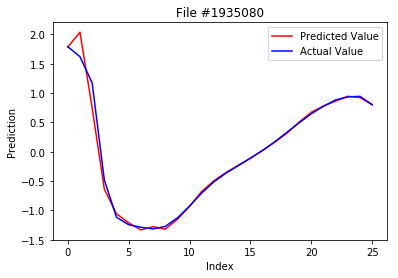

MSE 0.0151759



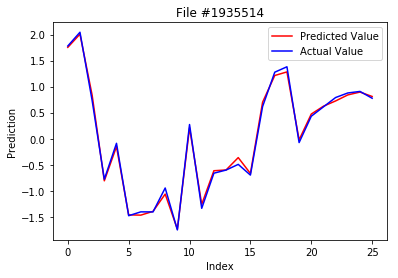

MSE 0.00377035



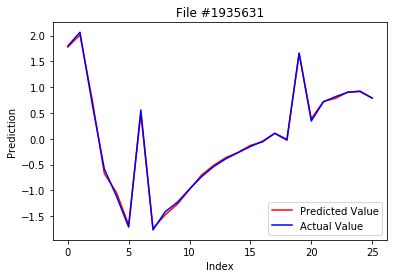

MSE 0.00161846



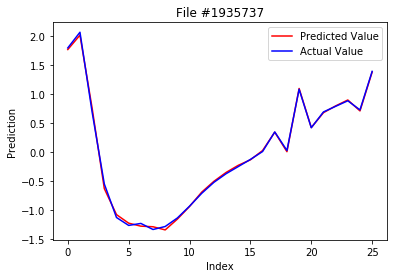

MSE 0.00116011



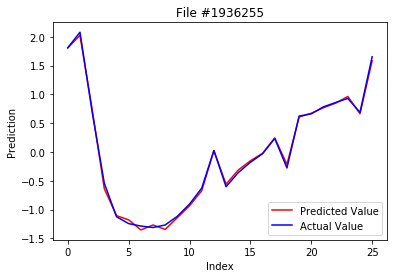

MSE 0.00190984



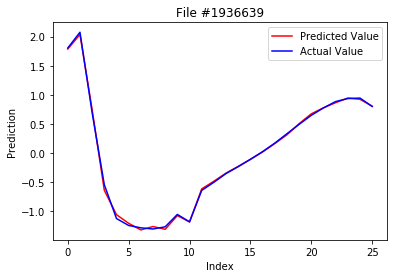

MSE 0.00105707



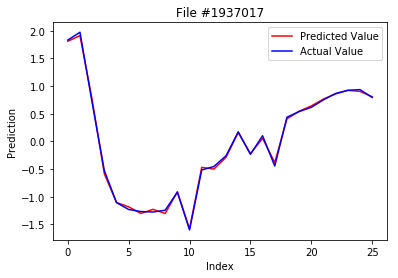

MSE 0.00134029



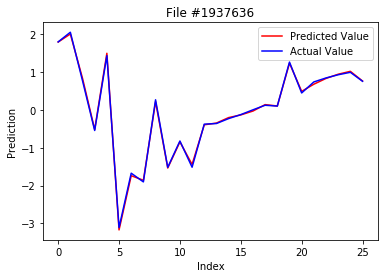

MSE 0.00152432



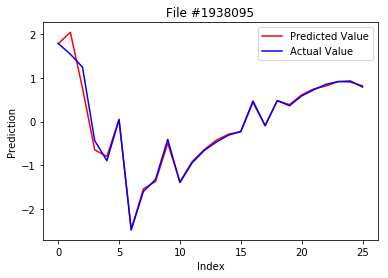

MSE 0.0217353



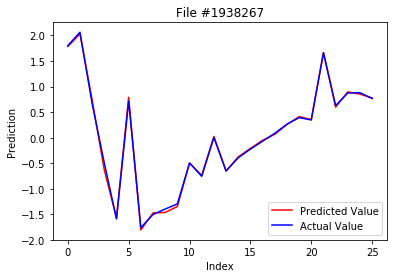

MSE 0.00180997



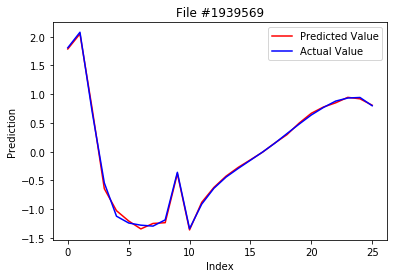

MSE 0.00151724



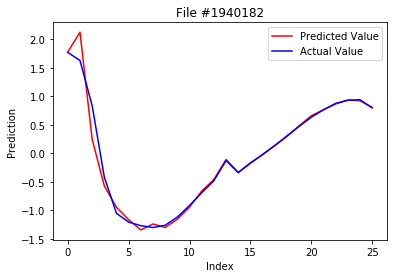

MSE 0.0249419



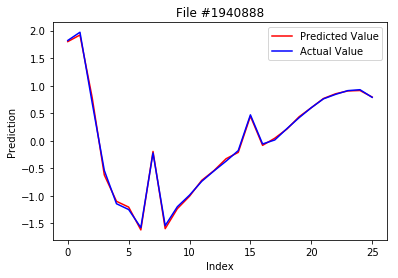

MSE 0.00139137



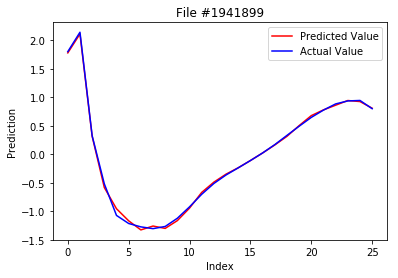

MSE 0.0013155



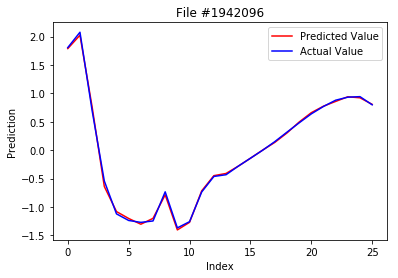

MSE 0.00115014



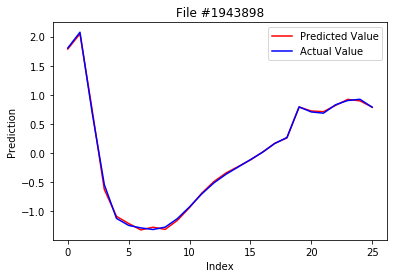

MSE 0.000812675



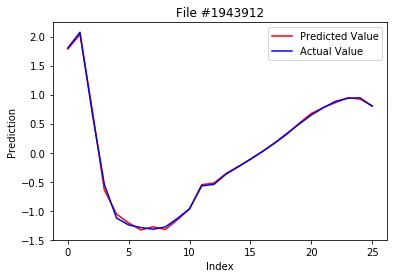

MSE 0.00107711



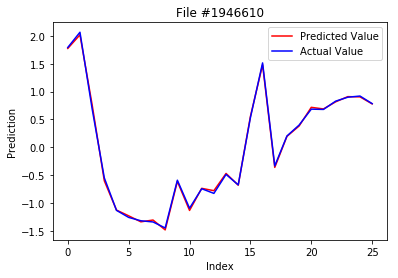

MSE 0.000896335



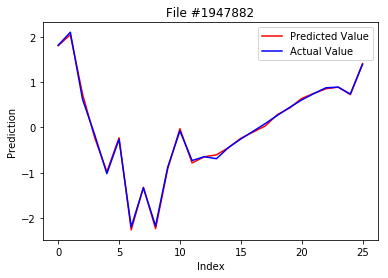

MSE 0.00192155



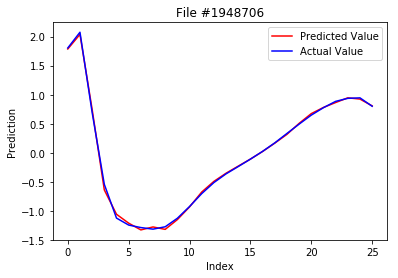

MSE 0.0010755



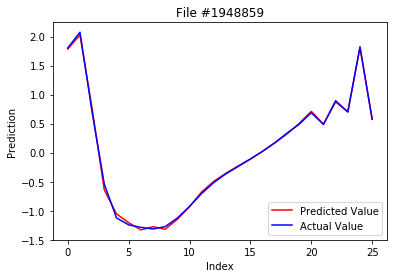

MSE 0.00121682



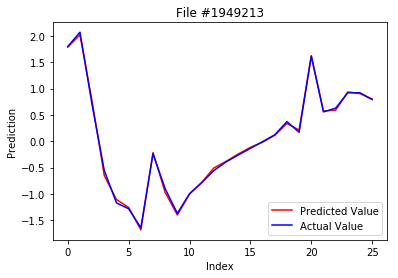

MSE 0.00143145



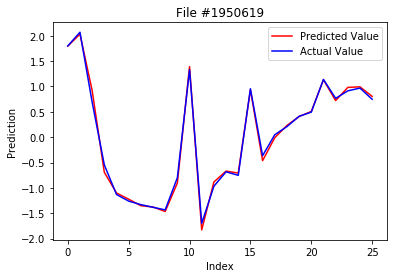

MSE 0.00556086



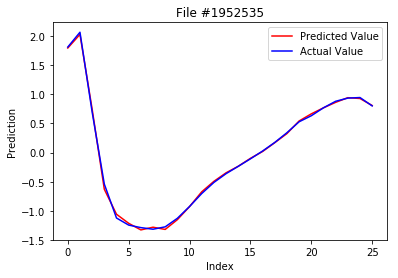

MSE 0.000992293



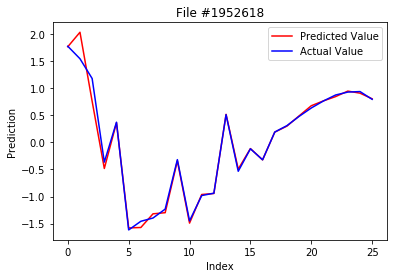

MSE 0.0178742



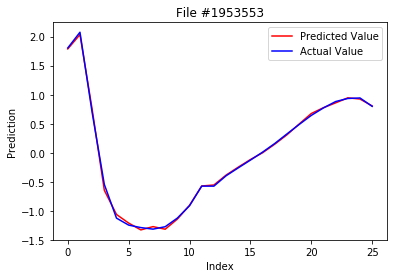

MSE 0.0011255



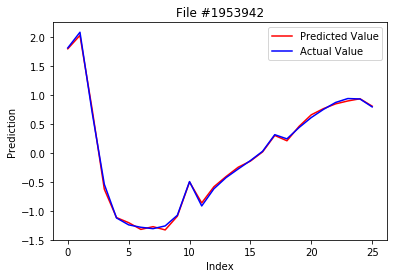

MSE 0.00132658



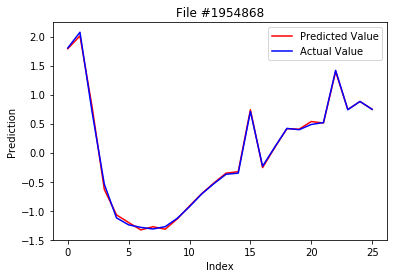

MSE 0.00136922



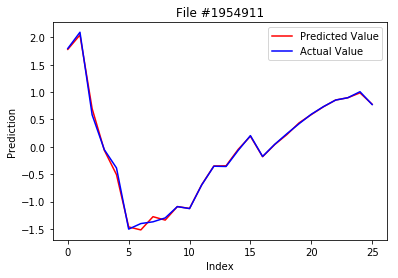

MSE 0.00220294



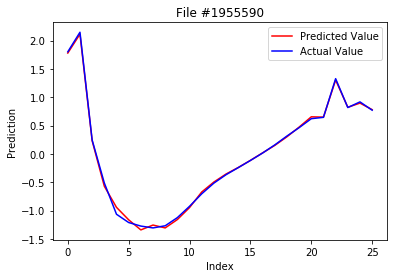

MSE 0.00140779



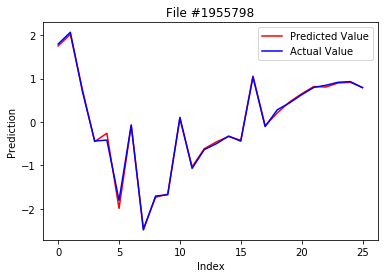

MSE 0.0031332



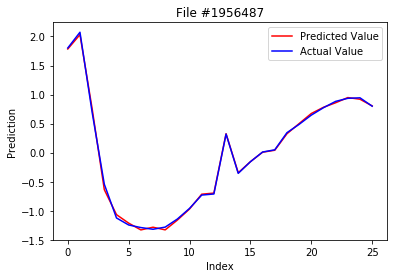

MSE 0.00106981



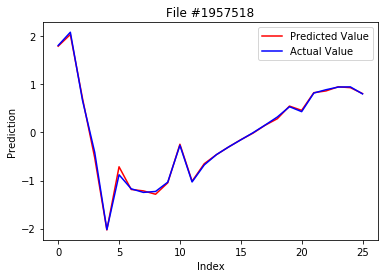

MSE 0.00207033



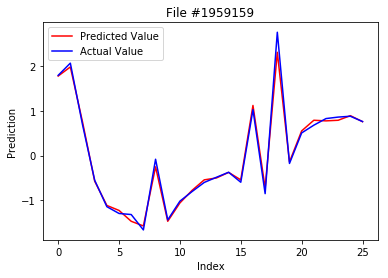

MSE 0.0128341



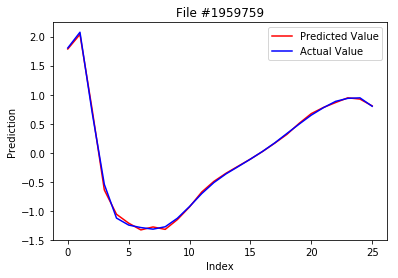

MSE 0.0010755



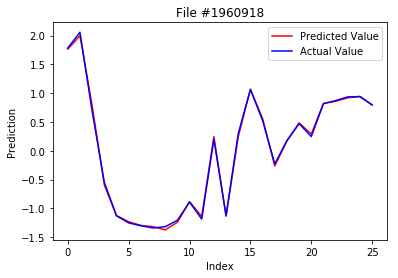

MSE 0.00128446



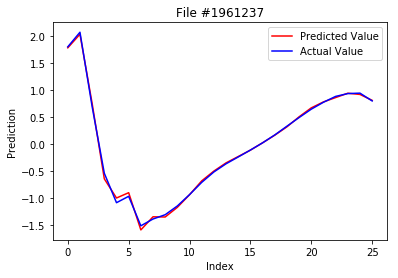

MSE 0.00159207



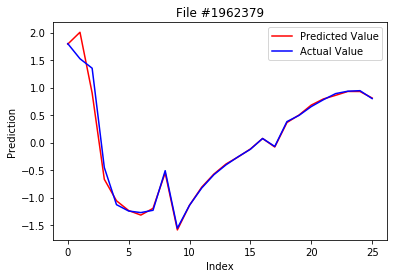

MSE 0.0190525



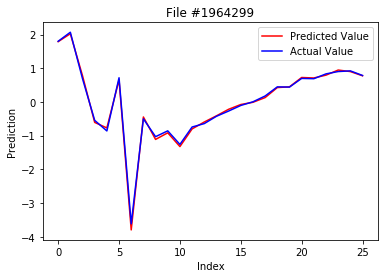

MSE 0.00358888



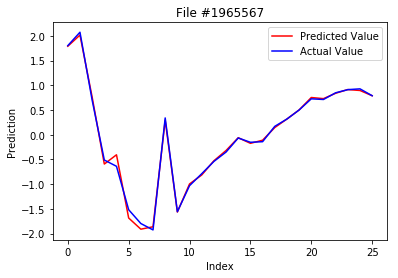

MSE 0.00471643



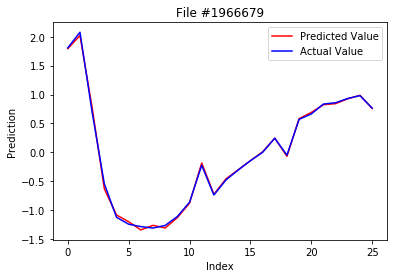

MSE 0.00122842



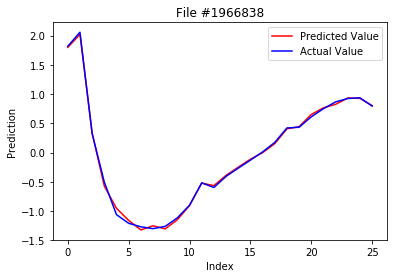

MSE 0.00135295



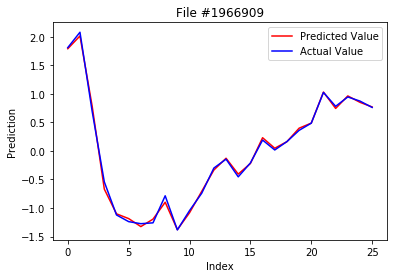

MSE 0.00246805



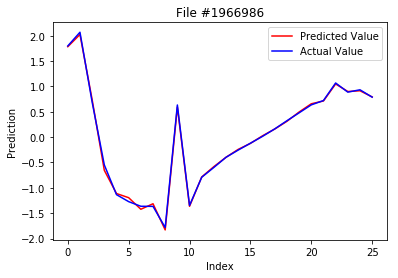

MSE 0.00135591



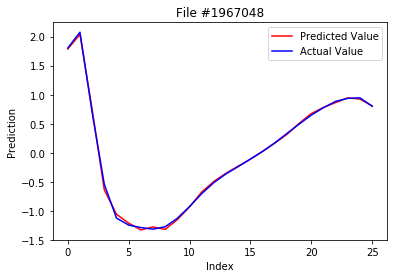

MSE 0.0010755



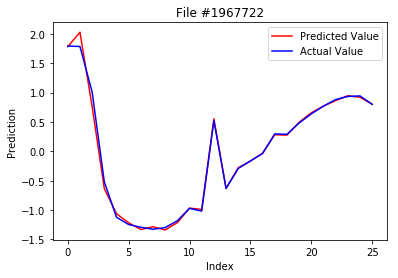

MSE 0.00568655



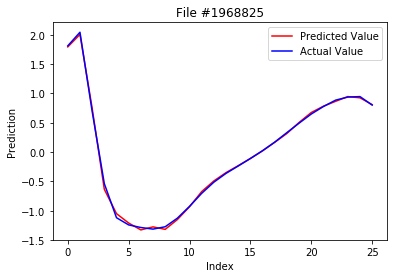

MSE 0.00111959



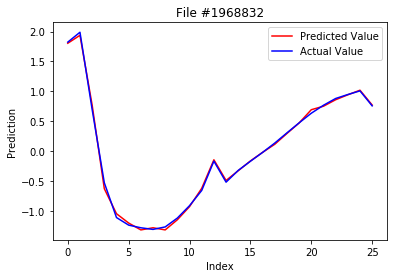

MSE 0.00140663



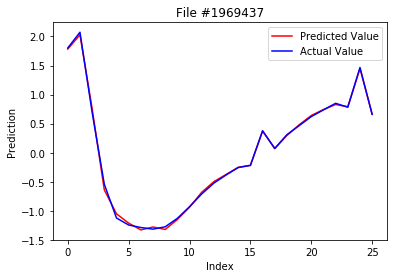

MSE 0.00117143



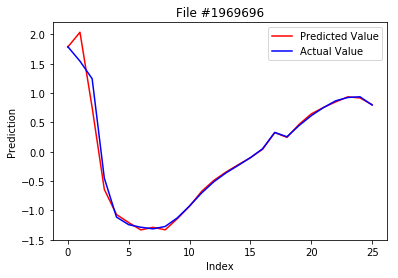

MSE 0.0205307



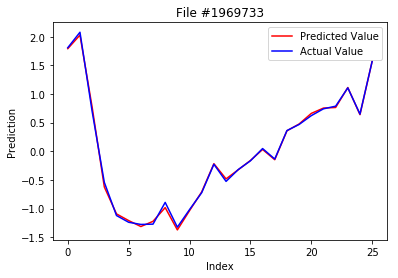

MSE 0.00138646



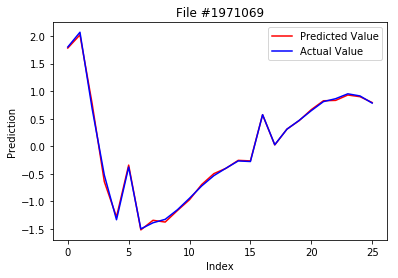

MSE 0.00151404



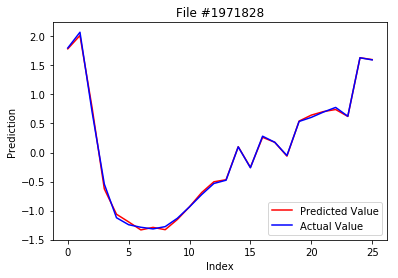

MSE 0.00128015



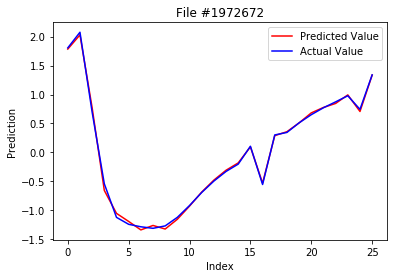

MSE 0.00167648



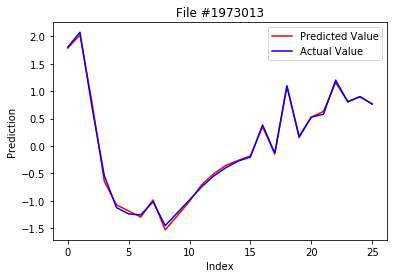

MSE 0.00190741



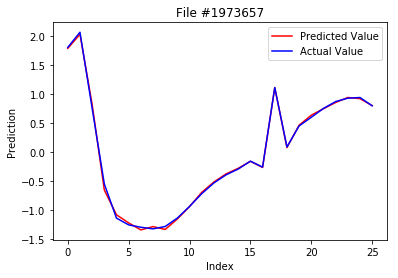

MSE 0.00119564



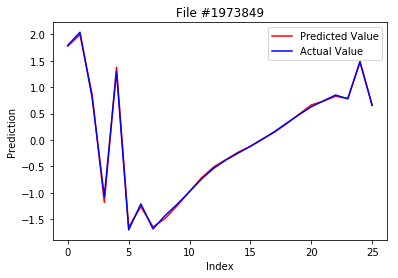

MSE 0.00151239



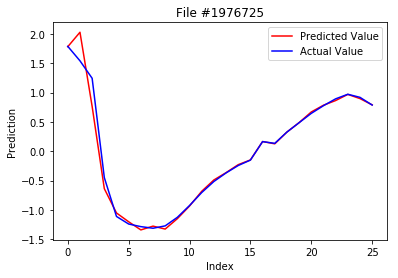

MSE 0.020041



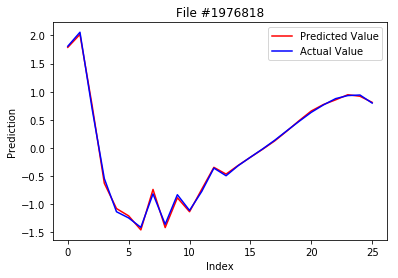

MSE 0.00142924



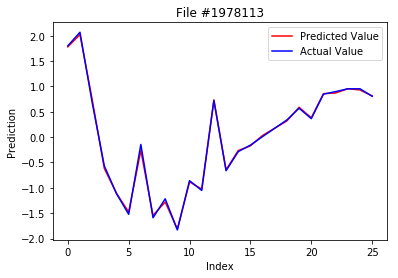

MSE 0.00138495



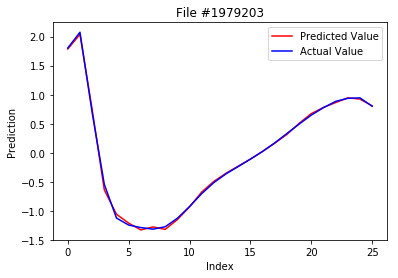

MSE 0.0010755



In [34]:
FILE_PATTERN = r'([0-9]+)\.csv'

mydir = '/Users/adam13/Documents/uni/TFM/climate_results/2017-02-14T09-11-26/'
files = find_files(mydir)


iterator = load_data_samples(mydir)



errors = list()

for label, pred, id_file, mse in iterator:
    errors.append(float(mse))
    plt.figure()
    plt.title("File #{}".format(id_file))
    plt.xlabel("Index")
    plt.ylabel("Prediction")
    plt.plot(pred, label="Predicted Value", color='red' )
    plt.plot(label, label="Actual Value",color='blue')
    plt.legend()
    plt.show()
    
    print ("MSE "+str(mse))
    


In [35]:
print (str(np.mean(errors)))

0.00415354253535
